In [278]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

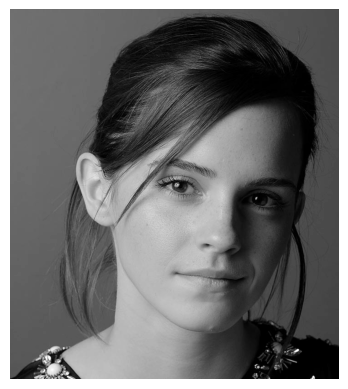

In [279]:
img = cv.imread("Images\emma.jpg", cv.IMREAD_GRAYSCALE)
assert img is not None


plt.imshow(img, cmap = "gray")
plt.axis('off')  # Turn off axis labels
plt.show()

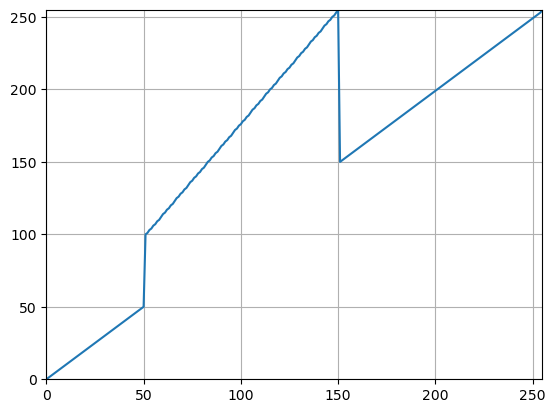

In [280]:
t1 = np.linspace(0, 50 ,51).astype('uint8')
t2 = np.linspace(100, 255, 100).astype('uint8')
t3 = np.linspace(150, 255, 255-150).astype('uint8')

transform = np.concatenate((t1,t2),axis=0).astype('uint8')
transform = np.concatenate((transform, t3),axis=0).astype('uint8')

plt.plot(transform)
plt.xlim(0,255)
plt.ylim(0,255)
plt.grid(True)
plt.show()

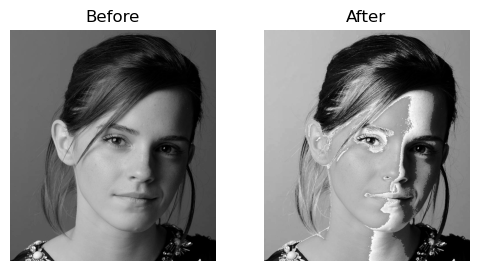

In [281]:
transformed_img = transform[img]

plt.figure(figsize=(6,3))


plt.subplot(1,2,1)
plt.imshow(img, cmap = "gray")
plt.title('Before')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(transformed_img, cmap = "gray")
plt.axis('off')
plt.title('After')
plt.show()


2

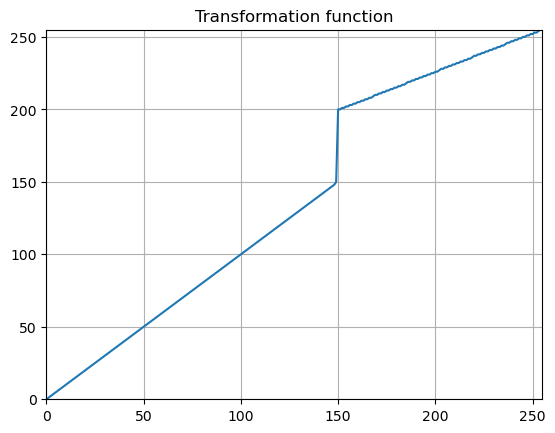

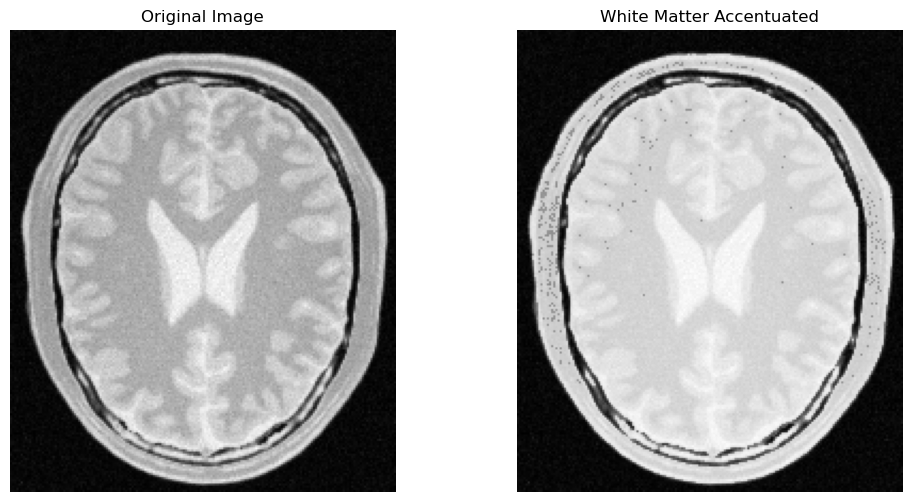

In [282]:
img = cv.imread("brain.png", cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0, 150, 150).astype('uint8') 
# t2: Higher intensity values (white matter, 150 to 255) -> enhance these values
t2 = np.linspace(200, 255, 255-150).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')

transformed_img = transform[img]


plt.plot(transform)
plt.title('Transformation function')
plt.xlim(0,255)
plt.ylim(0,255)
plt.grid(True)

plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image (white matter accentuated)
plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('White Matter Accentuated')
plt.axis('off')

plt.show()

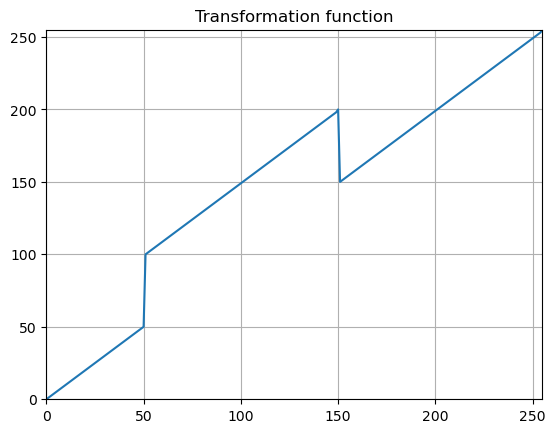

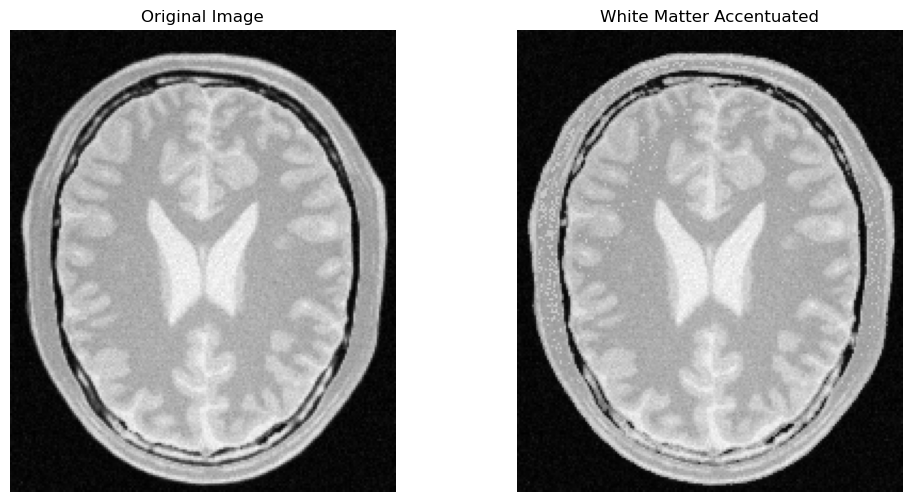

In [283]:
img = cv.imread("brain.png", cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0, 50, 51).astype('uint8')
# t2: Mid intensity values (gray matter, 50 to 150) -> boost these values to accentuate gray matter
t2 = np.linspace(100, 200, 150-50).astype('uint8')
t3 = np.linspace(150, 255, 255-150).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

transformed_img = transform[img]

plt.plot(transform)
plt.title('Transformation function')
plt.xlim(0,255)
plt.ylim(0,255)
plt.grid(True)

plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image (white matter accentuated)
plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('White Matter Accentuated')
plt.axis('off')

plt.show()

3

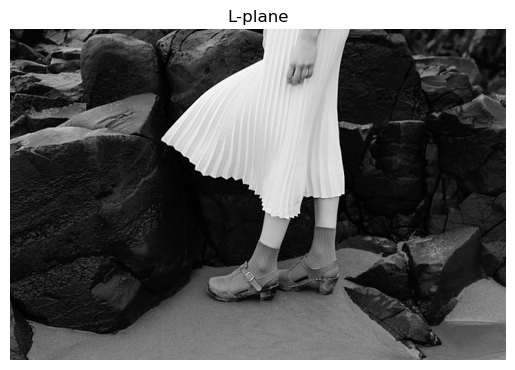

In [284]:

img = cv.imread('Images\highlights_and_shadows.jpg')
lab_image = cv.cvtColor(img, cv.COLOR_BGR2Lab)

# Split the Lab image into its L, a, and b components
L, a, b = cv.split(lab_image)

plt.imshow(L, cmap='gray')
plt.title('L-plane')
plt.axis('off')
plt.show()


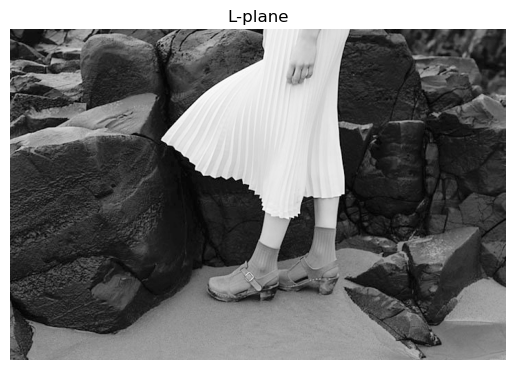

In [285]:
gemma = 0.7
g = np.array([((i/255.0)**gemma)*255 for i in L]).astype(np.uint8)
t = np.array([((i/255.0)**gemma)*255 for i in range(256)]).astype(np.uint8)

g2 = t[L]

plt.imshow(g2, cmap='gray')
plt.title('L-plane')
plt.axis('off')
plt.show()


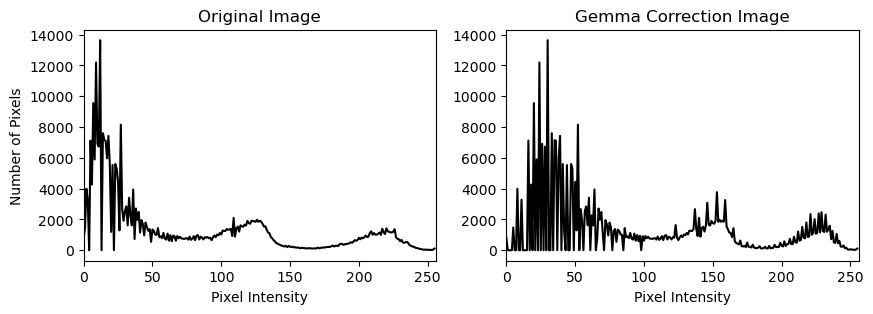

In [286]:
hist_original = cv.calcHist([L], [0], None, [256], [0, 256])
hist_gemma = cv.calcHist([g2], [0], None, [256], [0, 256])
# Plot the histogram
plt.figure(figsize=(10, 3))

plt.subplot(1,2,1)
plt.plot(hist_original, color='black')
plt.title('Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.xlim([0, 256])

plt.subplot(1,2,2)
plt.plot(hist_gemma, color='black')
plt.title('Gemma Correction Image')
plt.xlabel('Pixel Intensity')
plt.xlim([0, 256])
plt.show()

4

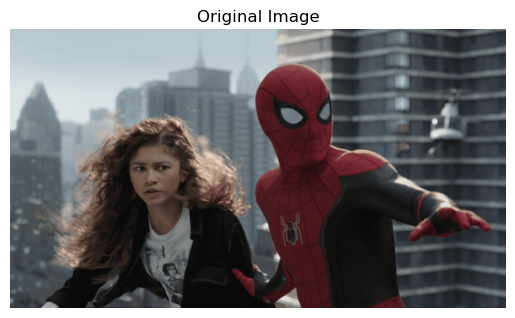

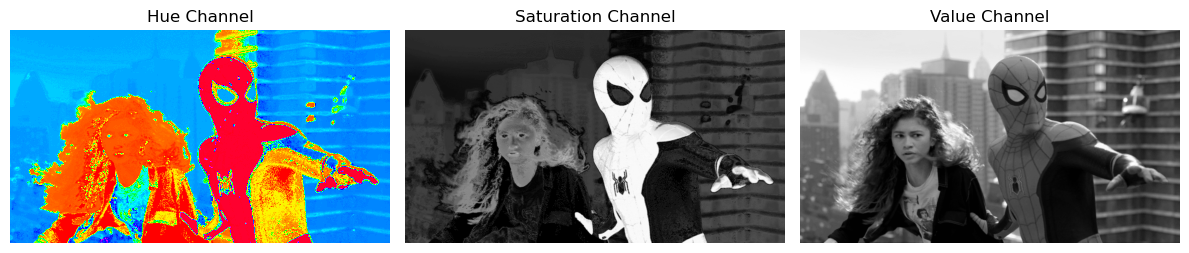

In [287]:
img = cv.imread('Images\spider.png')

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(hsv_img)



# Original image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.figure(figsize=(12, 8))
# Hue channel
plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

# Saturation channel
plt.subplot(1,3,2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

# Value (Vibrancy) channel
plt.subplot(1,3,3)
plt.imshow(value, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()


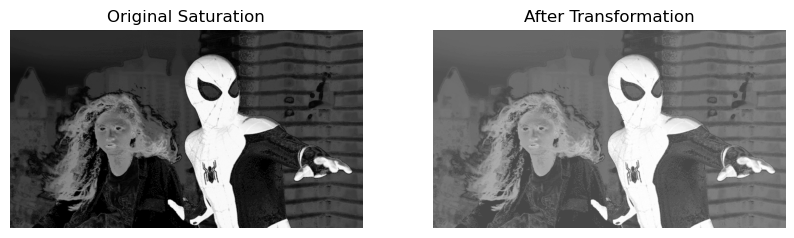

In [288]:
a = 0.55
sigma = 70

f = np.array([i + a*128*np.exp(((i-128)**2)/(2*sigma**2)) for i in saturation]).astype(np.uint8)
f = np.clip(f,0,255)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(saturation, cmap='gray')
plt.title('Original Saturation')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(f, cmap='gray')
plt.title('After Transformation')
plt.axis('off')

plt.show()

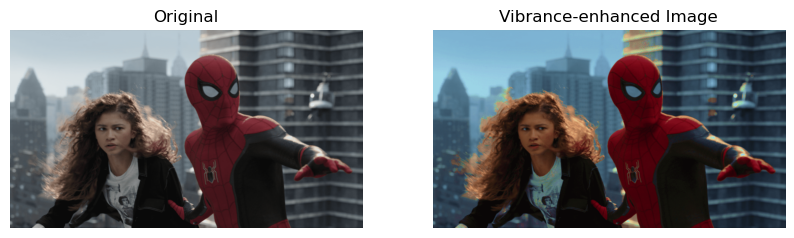

In [289]:
merged_hsv = cv.merge([hue, f, value])

merged_bgr = cv.cvtColor(merged_hsv, cv.COLOR_HSV2BGR)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(merged_bgr, cv.COLOR_BGR2RGB))
plt.title('Vibrance-enhanced Image')
plt.axis('off')

plt.show()

5

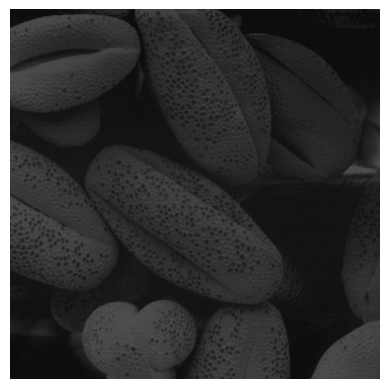

In [290]:
img = cv.imread('Images\shells.tif')
assert img is not None

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


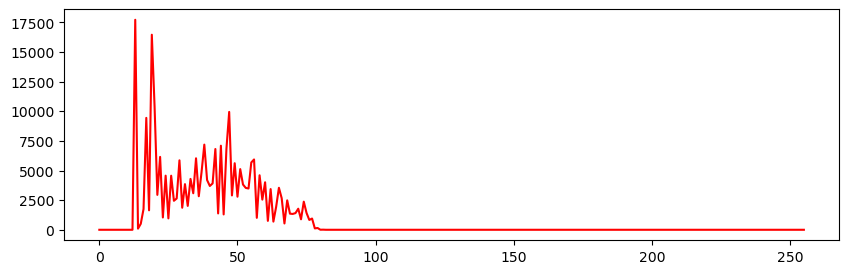

In [291]:
import cv2

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Calculate histograms for each channel
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# Plot the histograms for each channel
plt.figure(figsize=(10, 3))

plt.plot(hist, color='red', label='Red Channel')
plt.show()

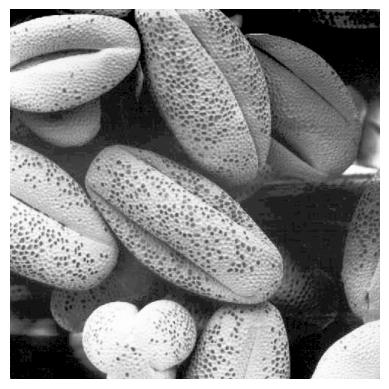

In [292]:
def hist_eq(X):
    L = 256
    MN = X.shape[0]*X.shape[1]
    hist = cv.calcHist([X], [0], None, [256], [0, 256])    
    s = []
    for i in range(256):
        s.append((L-1)*np.sum(hist[:i])/MN)
    eq = np.array(s).astype(np.uint8)
    return eq[X]

eq_img = hist_eq(img)


plt.imshow(cv.cvtColor(eq_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

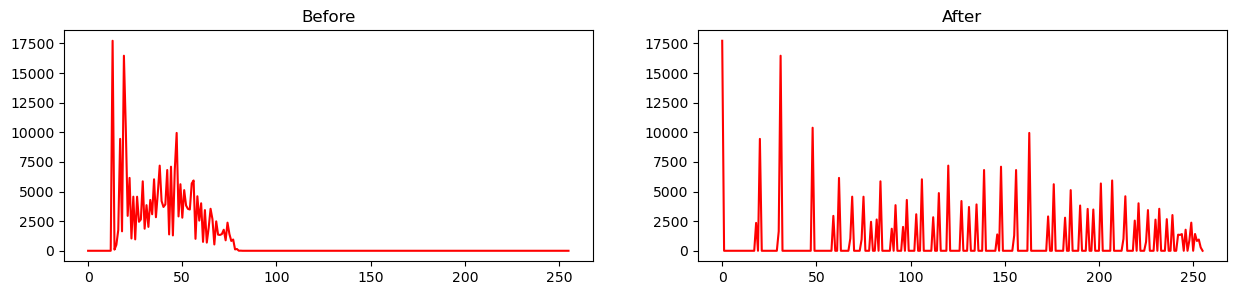

In [293]:
eq_img_gray = cv.cvtColor(eq_img, cv.COLOR_BGR2GRAY)
hist_after = cv2.calcHist([eq_img_gray], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 3))

plt.subplot(1,2,1)
plt.plot(hist, color='red')
plt.title('Before')

plt.subplot(1,2,2)
plt.plot(hist_after, color='red')
plt.title('After')
plt.show()

6

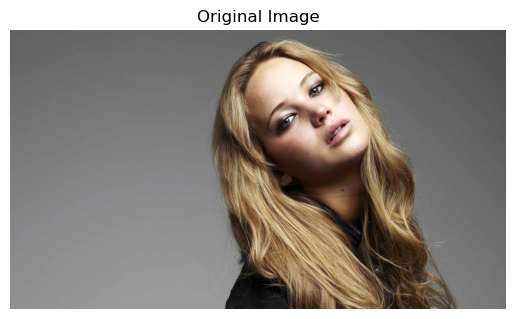

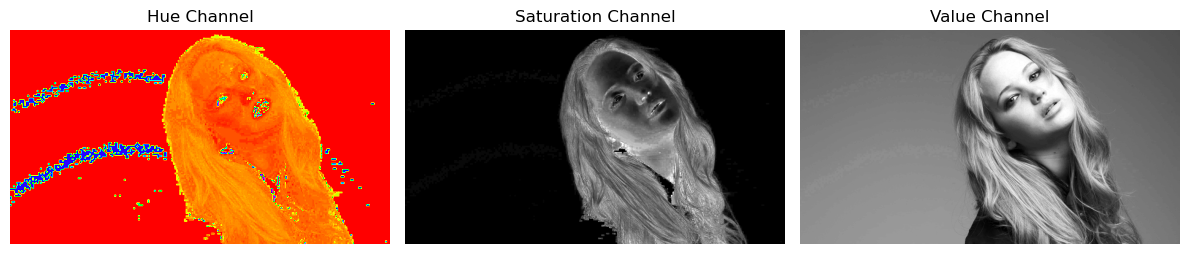

In [294]:
img = cv.imread("Images\jeniffer.jpg")
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(hsv_img)


# Original image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.figure(figsize=(12, 8))
# Hue channel
plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

# Saturation channel
plt.subplot(1,3,2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

# Value (Vibrancy) channel
plt.subplot(1,3,3)
plt.imshow(value, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

(-0.5, 3839.5, 2159.5, -0.5)

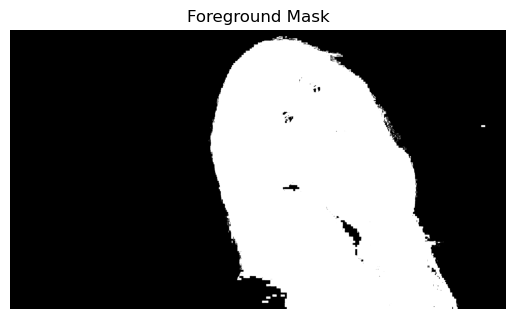

In [295]:
_,binary_mask = cv.threshold(saturation, 11, 255, cv2.THRESH_BINARY)

plt.imshow(binary_mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')

(-0.5, 3839.5, 2159.5, -0.5)

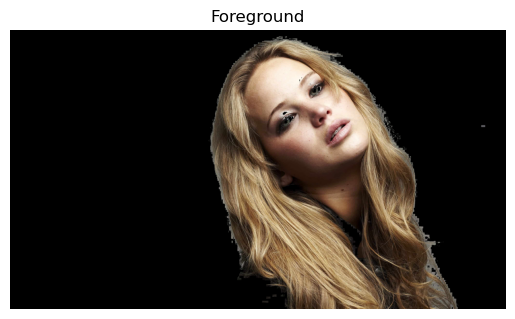

In [296]:
foreground = cv2.bitwise_and(img, img, mask=binary_mask)

plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')

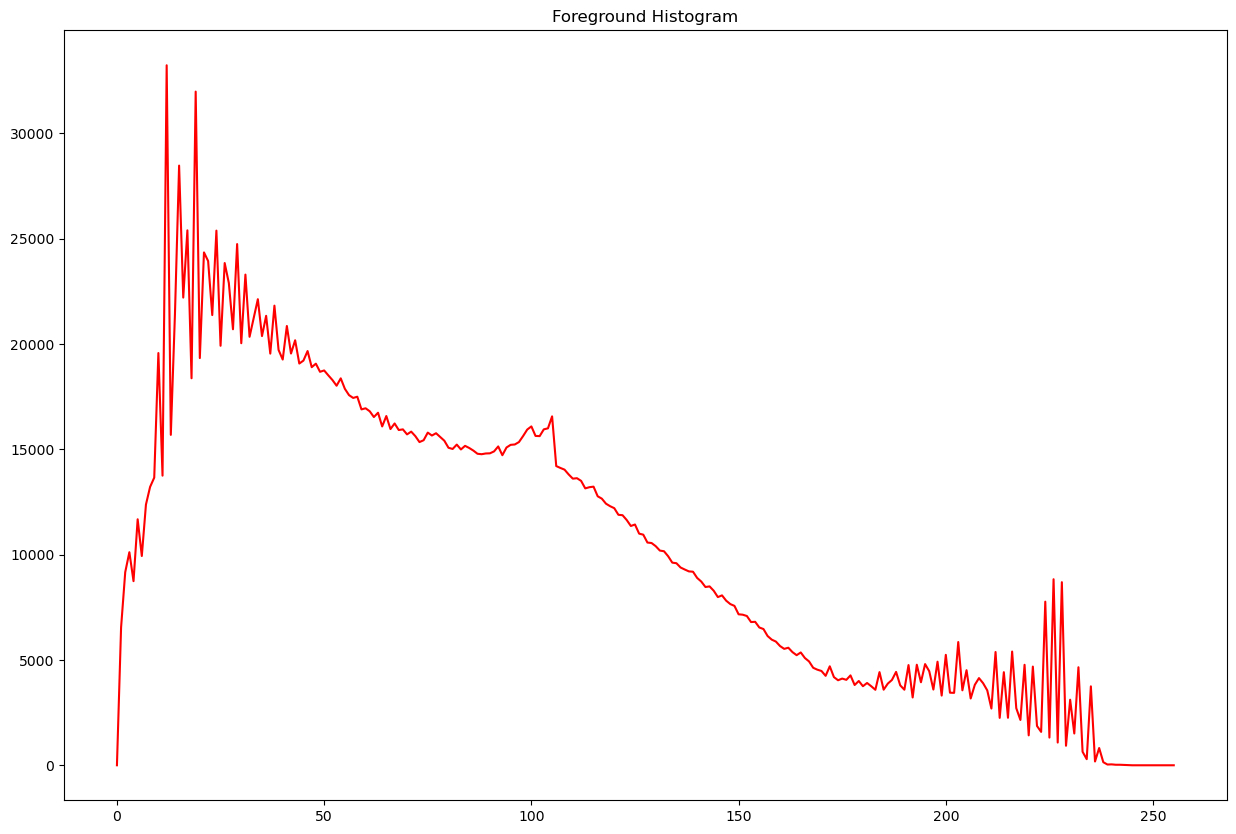

In [297]:
foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)

hist = cv.calcHist([foreground], [0], None, [256], [0, 256])

hist[0] = 0
plt.figure(figsize=(15, 10))

plt.plot(hist, color='red')
plt.title('Foreground Histogram')
plt.show()

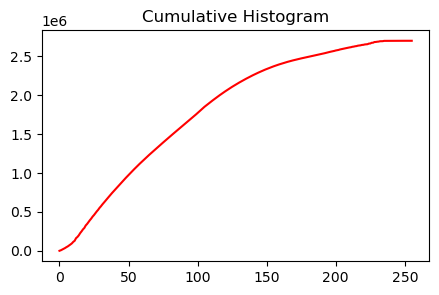

In [298]:
cumulative_hist = np.cumsum(hist)

plt.figure(figsize=(5,3))

plt.plot(cumulative_hist, color='red')
plt.title('Cumulative Histogram')
plt.show()


(-0.5, 3839.5, 2159.5, -0.5)

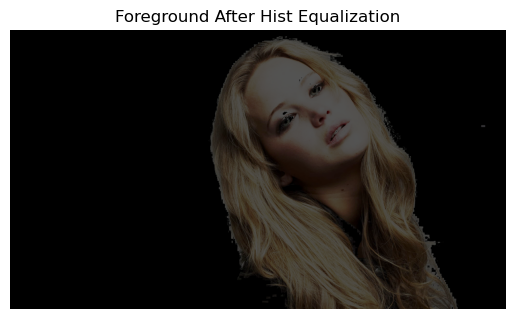

In [299]:
def hist_eq(X):
    L = 256
    MN = X.shape[0]*X.shape[1]    
    s = []
    for i in range(256):
        s.append((L-1)*cumulative_hist[i]/MN)
    eq = np.array(s).astype(np.uint8)
    return eq[X]

foreground_eq = hist_eq(foreground)

plt.imshow(cv2.cvtColor(foreground_eq, cv2.COLOR_BGR2RGB))
plt.title('Foreground After Hist Equalization')
plt.axis('off')

(-0.5, 3839.5, 2159.5, -0.5)

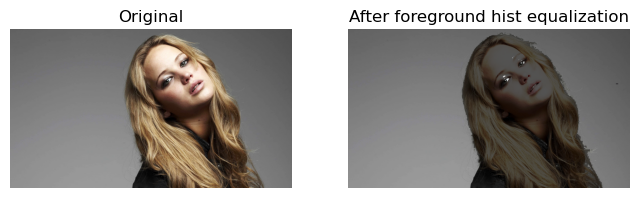

In [300]:
background_mask = ~binary_mask
background = cv2.bitwise_and(img, img, mask=background_mask)

full_image = background + foreground_eq

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB))
plt.title('After foreground hist equalization')
plt.axis('off')

7

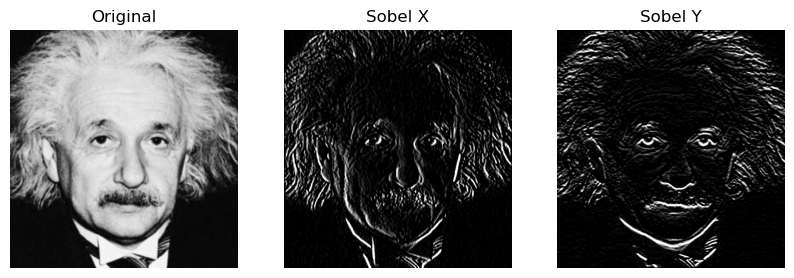

In [301]:
img = cv.imread("Images\einstein.png", cv.IMREAD_GRAYSCALE)
assert img is not None

sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]], dtype=np.float32)

sobel_filtered_x = cv2.filter2D(img, -1, sobel_x)
sobel_filtered_y = cv2.filter2D(img, -1, sobel_y)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(sobel_filtered_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sobel_filtered_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.show()

In [302]:
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]], dtype=np.float32)

def convolve(img, kernal):
    kernal_hw = int(kernal.shape[0]/2)
    boardered_img = cv2.copyMakeBorder( img, top=kernal_hw, bottom=kernal_hw, left=kernal_hw, right=kernal_hw, borderType=cv2.BORDER_REFLECT)
    img_convolved = np.zeros_like(img)
    kernal_flipped = cv.flip(kernal, -1)    

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum = 0
            for l in range(kernal.shape[0]):
                for m in range(kernal.shape[1]):
                    sum = sum+(boardered_img[i+l][j+m])*(kernal_flipped[l][m])
            img_convolved[i][j] = sum
            
    img_convolved = np.clip(img_convolved, 0, 255)
    return np.array(img_convolved).astype(np.uint8)




(-0.5, 363.5, 379.5, -0.5)

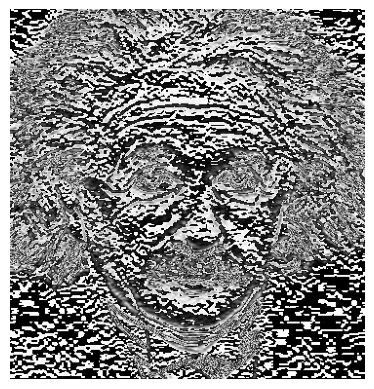

In [303]:
filtered_x = convolve(img,sobel_y)

plt.imshow(filtered_x, cmap='gray')
plt.axis('off')